## Child mortality prediction - data preparation part 3
After some initial data cleaning in the previous step,
In this notebook we will use the new csv files that contains only the columns the we need.
And we will continue the data preprocessing 

### Step 1 - Load the updated datasets and examine the data

In [1]:
## Load 1st CSV file
import pandas as pd
import numpy as np
import scipy.stats as stats

url1 = 'my_data/new_drinking_water.csv'
df1 = pd.read_csv(url1, delimiter=',')
print(f"df1 type: {type(df1)}")   ## df type: <class 'pandas.core.frame.DataFrame'>
print(f"df1 shape: {df1.shape}")  ## df shape: (196, 22)'

df1 type: <class 'pandas.core.frame.DataFrame'>
df1 shape: (196, 22)


In [2]:
df1.head(10)

,Countries,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,75.0,72.0,70.0,67.0,64.0,61.0,59.0,56.0,53.0,...,46.0,43.0,41.0,38.0,36.0,34.0,32.0,30.0,28.0,28.0
1,Albania,95.0,95.0,94.0,94.0,94.0,93.0,93.0,93.0,92.0,...,91.0,90.0,90.0,90.0,89.0,89.0,88.0,87.0,87.0,87.0
2,Algeria,94.0,94.0,94.0,94.0,94.0,93.0,93.0,93.0,93.0,...,92.0,92.0,92.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0
3,Andorra,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,Angola,57.0,57.0,57.0,56.0,55.0,54.0,54.0,53.0,52.0,...,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,42.0,41.0
5,Antigua and Barbuda,NaN,NaN,NaN,97.0,97.0,97.0,97.0,97.0,97.0,...,97.0,97.0,97.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0
6,Argentina,NaN,NaN,NaN,NaN,99.0,99.0,99.0,99.0,99.0,...,98.0,98.0,98.0,98.0,97.0,97.0,97.0,97.0,97.0,96.0
7,Armenia,100.0,100.0,100.0,100.0,100.0,100.0,99.0,99.0,99.0,...,98.0,98.0,97.0,97.0,97.0,96.0,96.0,96.0,95.0,95.0
8,Australia,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
9,Austria,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [3]:
## Load 2nd CSV file

url2 = 'child_mort_data/child_mortality_allregions.csv'
df2 = pd.read_csv(url2, delimiter=',')
print(f"df2 type: {type(df2)}")   ## df type: <class 'pandas.core.frame.DataFrame'>
print(f"df2 shape: {df2.shape}")  ## df shape: (39, 22) '

df2 type: <class 'pandas.core.frame.DataFrame'>
df2 shape: (199, 22)


In [4]:
df2.head(10)

,Countries,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Algeria,22.90,23.45,23.98,24.48,24.92,25.30,25.67,26.05,26.49,...,28.71,29.77,30.98,32.34,33.78,35.30,36.87,38.49,40.10,41.69
1,Angola,72.07,75.04,77.97,81.08,84.45,88.34,92.91,98.31,104.88,...,128.50,137.54,147.10,156.78,166.19,175.45,184.16,191.94,198.90,205.14
2,Benin,86.03,88.61,91.10,93.44,95.64,97.87,100.13,102.35,104.60,...,111.45,113.82,116.29,118.87,121.60,124.44,127.43,130.49,133.64,136.81
3,Botswana,36.31,37.74,38.96,39.94,43.52,45.37,48.18,50.31,55.22,...,65.93,68.78,68.59,68.85,71.32,73.68,73.05,72.24,73.17,74.01
4,Burkina Faso,85.35,88.23,91.35,94.50,97.66,101.09,104.73,108.73,112.90,...,127.22,133.05,139.34,146.04,152.79,159.15,164.99,170.17,174.69,178.71
5,Burundi,54.61,56.74,59.08,61.74,64.58,67.86,71.56,75.74,80.47,...,97.02,103.46,110.33,117.51,124.70,131.73,138.07,143.94,149.46,154.60
6,Cabo Verde,14.22,14.99,15.90,16.99,18.29,19.74,21.26,22.78,24.21,...,27.17,27.58,27.77,27.84,28.04,28.60,29.72,31.62,34.44,38.09
7,Cameroon,72.42,75.09,77.71,80.80,84.33,88.12,92.48,96.88,101.50,...,114.51,117.77,121.30,124.57,127.94,131.14,134.64,138.16,141.51,144.45
8,Central African Republic,103.05,105.91,108.78,110.92,112.65,115.53,118.57,121.11,123.32,...,133.51,137.47,141.18,145.30,149.71,153.60,157.30,160.65,163.60,166.14
9,Chad,110.53,114.34,118.02,121.88,125.81,129.49,133.30,136.88,140.63,...,152.33,156.29,160.13,163.85,167.46,170.92,174.30,177.67,181.02,184.35


### Step 2 - Make the data machine readable and replace missing values

In [5]:
# In the first dataset, Change the data type of the last 21 columns to float
for i in range(len(df1.columns) - 21, len(df1.columns)):
    df1[df1.columns[i]] = df1[df1.columns[i]].astype(float)

# Display the updated DataFrame
print(df1)

                              Countries   2020   2019   2018   2017   2016  \
0                           Afghanistan   75.0   72.0   70.0   67.0   64.0   
1                               Albania   95.0   95.0   94.0   94.0   94.0   
2                               Algeria   94.0   94.0   94.0   94.0   94.0   
3                               Andorra  100.0  100.0  100.0  100.0  100.0   
4                                Angola   57.0   57.0   57.0   56.0   55.0   
..                                  ...    ...    ...    ...    ...    ...   
191  Venezuela (Bolivarian Republic of)   94.0   94.0   94.0   94.0   94.0   
192                            Viet Nam   97.0   96.0   96.0   95.0   94.0   
193                               Yemen   61.0   60.0   59.0   58.0   57.0   
194                              Zambia   65.0   65.0   64.0   63.0   62.0   
195                            Zimbabwe   63.0   63.0   64.0   64.0   64.0   

      2015   2014   2013   2012  ...   2009   2008   2007   200

In [6]:
# In the second dataset, Change the data type of the last 21 columns to float
for i in range(len(df2.columns) - 21, len(df2.columns)):
    df2[df2.columns[i]] = df2[df2.columns[i]].astype(float)

# Display the updated DataFrame
print(df2)

           Countries   2020   2019   2018   2017   2016    2015    2014  \
0            Algeria  22.90  23.45  23.98  24.48  24.92   25.30   25.67   
1             Angola  72.07  75.04  77.97  81.08  84.45   88.34   92.91   
2              Benin  86.03  88.61  91.10  93.44  95.64   97.87  100.13   
3           Botswana  36.31  37.74  38.96  39.94  43.52   45.37   48.18   
4       Burkina Faso  85.35  88.23  91.35  94.50  97.66  101.09  104.73   
..               ...    ...    ...    ...    ...    ...     ...     ...   
194  Solomon Islands  19.39  20.02  20.69  21.37  22.08   22.77   23.46   
195            Tonga  11.43  11.70  11.91  12.10  12.25   12.37   12.48   
196           Tuvalu  21.93  22.68  23.57  24.34  25.26   26.10   27.08   
197          Vanuatu  24.01  24.67  25.33  26.02  26.68   27.30   27.84   
198         Viet Nam  20.85  21.06  21.25  21.46  21.67   21.89   22.11   

       2013    2012  ...    2009    2008    2007    2006    2005    2004  \
0     26.05   26.49  ..

In [7]:
# Count the total number of empty or NaN values in both datasets
missing_values_df1 = df1.isnull().sum().sum()
missing_values_df2 = df2.isnull().sum().sum()

# Display the result
print("Total number of empty or NaN values in the 1st dataset:", missing_values_df1)
print("Total number of empty or NaN values in the 2nd dataset:", missing_values_df2)

Total number of empty or NaN values in the 1st dataset: 78
Total number of empty or NaN values in the 2nd dataset: 0


In [8]:
# Replace missing values in the first datasets with column means 
df1= df1.fillna(df1.mean())
missing_values_df1 = df1.isnull().sum().sum()

# Display the updated DataFrame
print("Total number of empty or NaN values in the 1st dataset:", missing_values_df1)
print("Total number of empty or NaN values in the 2nd dataset:", missing_values_df2)


Total number of empty or NaN values in the 1st dataset: 0
Total number of empty or NaN values in the 2nd dataset: 0


C:\Users\esspe\AppData\Local\Temp\ipykernel_17380\3649121735.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1= df1.fillna(df1.mean())


### Step 3 - Add a new column to save the mean value througout the years

In [9]:
# In the first dataset, Calculate the mean value of the last 21 columns (Drinking Water usage)
mean_DWU = df1.iloc[:, -21:].mean(axis=1).round(2) ## round the mean values to two decimal places.

# Insert the new column in the second position
df1.insert(1, 'mean_DWU', mean_DWU)

# Display the updated DataFrame
print(df1)

                              Countries  mean_DWU   2020   2019   2018   2017  \
0                           Afghanistan     49.14   75.0   72.0   70.0   67.0   
1                               Albania     91.14   95.0   95.0   94.0   94.0   
2                               Algeria     92.24   94.0   94.0   94.0   94.0   
3                               Andorra    100.00  100.0  100.0  100.0  100.0   
4                                Angola     50.05   57.0   57.0   57.0   56.0   
..                                  ...       ...    ...    ...    ...    ...   
191  Venezuela (Bolivarian Republic of)     95.48   94.0   94.0   94.0   94.0   
192                            Viet Nam     88.86   97.0   96.0   96.0   95.0   
193                               Yemen     50.52   61.0   60.0   59.0   58.0   
194                              Zambia     57.00   65.0   65.0   64.0   63.0   
195                            Zimbabwe     67.57   63.0   63.0   64.0   64.0   

      2016   2015   2014   

In [10]:
# In the second dataset, Calculate the mean value of the last 21 columns (Children Mortality rate)
mean_CMR = df2.iloc[:, -21:].mean(axis=1).round(2) ## round the mean values to two decimal places.

# Insert the new column in the second position
df2.insert(1, 'mean_CMR', mean_CMR)

# Display the updated DataFrame
print(df2)

           Countries  mean_CMR   2020   2019   2018   2017   2016    2015  \
0            Algeria     29.82  22.90  23.45  23.98  24.48  24.92   25.30   
1             Angola    128.52  72.07  75.04  77.97  81.08  84.45   88.34   
2              Benin    110.03  86.03  88.61  91.10  93.44  95.64   97.87   
3           Botswana     58.52  36.31  37.74  38.96  39.94  43.52   45.37   
4       Burkina Faso    127.13  85.35  88.23  91.35  94.50  97.66  101.09   
..               ...       ...    ...    ...    ...    ...    ...     ...   
194  Solomon Islands     25.84  19.39  20.02  20.69  21.37  22.08   22.77   
195            Tonga     13.63  11.43  11.70  11.91  12.10  12.25   12.37   
196           Tuvalu     31.80  21.93  22.68  23.57  24.34  25.26   26.10   
197          Vanuatu     27.64  24.01  24.67  25.33  26.02  26.68   27.30   
198         Viet Nam     23.84  20.85  21.06  21.25  21.46  21.67   21.89   

       2014    2013  ...    2009    2008    2007    2006    2005    2004  \

### Step 4 - Ensure the data is in a proper format in order to merge both datasets

In [11]:
## Both datasets have the same columns names (Countries, years 2000-2020)
## So we will update the names of the columns so we can easily differentiate them after merging the datasets

## In the first dataset, let's add _DWU for Drinking Water usage

# Add the string to the names of the last 21 columns 
updated_columns_df1 = [col + "_DWU" if i >= len(df1.columns) - 21 else col for i, col in enumerate(df1.columns)]

# Rename the columns
df1.columns = updated_columns_df1

# Display the updated DataFrame
print(df1.columns)


Index(['Countries', 'mean_DWU', '2020_DWU', '2019_DWU', '2018_DWU', '2017_DWU',
       '2016_DWU', '2015_DWU', '2014_DWU', '2013_DWU', '2012_DWU', '2011_DWU',
       '2010_DWU', '2009_DWU', '2008_DWU', '2007_DWU', '2006_DWU', '2005_DWU',
       '2004_DWU', '2003_DWU', '2002_DWU', '2001_DWU', '2000_DWU'],
      dtype='object')


In [12]:
## In the second dataset, let's add _CMR for Children Mortality (children under five)

# Add the string to the names of the last 21 columns
updated_columns_df2 = [col + "_CMR" if i >= len(df2.columns) - 21 else col for i, col in enumerate(df2.columns)]

# Rename the columns
df2.columns = updated_columns_df2

# Display the updated DataFrame
print(df2.columns)

Index(['Countries', 'mean_CMR', '2020_CMR', '2019_CMR', '2018_CMR', '2017_CMR',
       '2016_CMR', '2015_CMR', '2014_CMR', '2013_CMR', '2012_CMR', '2011_CMR',
       '2010_CMR', '2009_CMR', '2008_CMR', '2007_CMR', '2006_CMR', '2005_CMR',
       '2004_CMR', '2003_CMR', '2002_CMR', '2001_CMR', '2000_CMR'],
      dtype='object')


In [13]:
## Now we can merge both datasets with their similar column 'Countries'
df_final = pd.merge(df1,df2, on='Countries')

print(f"df_final shape: {df_final.shape}") ## df shape: (196, 43)
df_final.head()

df_final shape: (196, 45)


,Countries,mean_DWU,2020_DWU,2019_DWU,2018_DWU,2017_DWU,2016_DWU,2015_DWU,2014_DWU,2013_DWU,...,2009_CMR,2008_CMR,2007_CMR,2006_CMR,2005_CMR,2004_CMR,2003_CMR,2002_CMR,2001_CMR,2000_CMR
0,Afghanistan,49.14,75.0,72.0,70.0,67.0,64.0,61.0,59.0,56.0,...,91.79,95.87,100.04,104.27,108.56,112.79,117.03,121.19,125.31,129.34
1,Albania,91.14,95.0,95.0,94.0,94.0,94.0,93.0,93.0,93.0,...,14.49,15.76,17.10,18.52,19.98,21.46,22.93,24.38,25.80,27.18
2,Algeria,92.24,94.0,94.0,94.0,94.0,94.0,93.0,93.0,93.0,...,28.71,29.77,30.98,32.34,33.78,35.30,36.87,38.49,40.10,41.69
3,Andorra,100.00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,4.82,5.08,5.35,5.65,5.96,6.26,6.54,6.87,7.22,7.61
4,Angola,50.05,57.0,57.0,57.0,56.0,55.0,54.0,54.0,53.0,...,128.50,137.54,147.10,156.78,166.19,175.45,184.16,191.94,198.90,205.14


In [14]:
## let's ensure that the column 'mean_CMR' is at the 3rd place in the merged dataset
# Remove the column from its current position
column = df_final.pop('mean_CMR' )

# Insert the column at the second position
df_final.insert(2, 'mean_CMR', column)

# Display the updated DataFrame
df_final.head()

,Countries,mean_DWU,mean_CMR,2020_DWU,2019_DWU,2018_DWU,2017_DWU,2016_DWU,2015_DWU,2014_DWU,...,2009_CMR,2008_CMR,2007_CMR,2006_CMR,2005_CMR,2004_CMR,2003_CMR,2002_CMR,2001_CMR,2000_CMR
0,Afghanistan,49.14,90.01,75.0,72.0,70.0,67.0,64.0,61.0,59.0,...,91.79,95.87,100.04,104.27,108.56,112.79,117.03,121.19,125.31,129.34
1,Albania,91.14,15.29,95.0,95.0,94.0,94.0,94.0,93.0,93.0,...,14.49,15.76,17.10,18.52,19.98,21.46,22.93,24.38,25.80,27.18
2,Algeria,92.24,29.82,94.0,94.0,94.0,94.0,94.0,93.0,93.0,...,28.71,29.77,30.98,32.34,33.78,35.30,36.87,38.49,40.10,41.69
3,Andorra,100.00,4.81,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,4.82,5.08,5.35,5.65,5.96,6.26,6.54,6.87,7.22,7.61
4,Angola,50.05,128.52,57.0,57.0,57.0,56.0,55.0,54.0,54.0,...,128.50,137.54,147.10,156.78,166.19,175.45,184.16,191.94,198.90,205.14


### Step 5 - Add a visualization to analyze the data

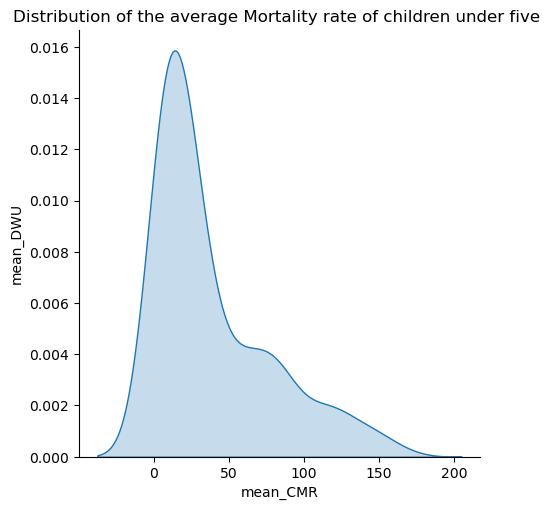

In [15]:
## Display the data in a histogram plot 
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram plot and specify the column to plot
#plt.hist(df_final['mean_CMR'], bins=10)

sns.displot(df_final,x='mean_CMR',kind='kde',fill=True) # smoothed histogram

# Set plot title and labels
plt.title('Distribution of the average Mortality rate of children under five ')
plt.xlabel('mean_CMR')
plt.ylabel('mean_DWU')

# Display the plot
plt.show()

In [17]:
# Save the final DataFrame to a new CSV file
df_final.to_csv('my_data/data_allregions.csv', index=False)

In [19]:
# Check the newly created file 
file_name = 'my_data/data_allregions.csv'
my_df = pd.read_csv(file_name, delimiter=',')
my_df.head()

,Countries,mean_DWU,mean_CMR,2020_DWU,2019_DWU,2018_DWU,2017_DWU,2016_DWU,2015_DWU,2014_DWU,...,2009_CMR,2008_CMR,2007_CMR,2006_CMR,2005_CMR,2004_CMR,2003_CMR,2002_CMR,2001_CMR,2000_CMR
0,Afghanistan,49.14,90.01,75.0,72.0,70.0,67.0,64.0,61.0,59.0,...,91.79,95.87,100.04,104.27,108.56,112.79,117.03,121.19,125.31,129.34
1,Albania,91.14,15.29,95.0,95.0,94.0,94.0,94.0,93.0,93.0,...,14.49,15.76,17.10,18.52,19.98,21.46,22.93,24.38,25.80,27.18
2,Algeria,92.24,29.82,94.0,94.0,94.0,94.0,94.0,93.0,93.0,...,28.71,29.77,30.98,32.34,33.78,35.30,36.87,38.49,40.10,41.69
3,Andorra,100.00,4.81,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,4.82,5.08,5.35,5.65,5.96,6.26,6.54,6.87,7.22,7.61
4,Angola,50.05,128.52,57.0,57.0,57.0,56.0,55.0,54.0,54.0,...,128.50,137.54,147.10,156.78,166.19,175.45,184.16,191.94,198.90,205.14


## Check notebook "child_mortality_prediction" to see how the data is used to train the ML model